In [ ]:
!pip3 install torch torchvision matplotlib

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 110705899.45it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 59177183.11it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28904976.52it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9597243.71it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
train_data.targets.size()

torch.Size([60000])

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader( test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1)
}

In [7]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f221e3e7970>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f221e3e7460>}

In [23]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x, dim=1)

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assurez-vous que l'objet 'loaders' est correctement défini (il semble manquer dans le version du code que vous avez partagé).

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)  # Correction : 'len(loaders["test"].dataset)' au lieu de 'len(loaders["test".dataset])'
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [29]:
for epoch in range(1,11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	2.301795
Train Epoch: 1 [2000/60000 (3%)]	2.287879
Train Epoch: 1 [4000/60000 (7%)]	2.196730
Train Epoch: 1 [6000/60000 (10%)]	2.047088
Train Epoch: 1 [8000/60000 (13%)]	1.850245
Train Epoch: 1 [10000/60000 (17%)]	1.808692
Train Epoch: 1 [12000/60000 (20%)]	1.786425
Train Epoch: 1 [14000/60000 (23%)]	1.831316
Train Epoch: 1 [16000/60000 (27%)]	1.730146
Train Epoch: 1 [18000/60000 (30%)]	1.640847
Train Epoch: 1 [20000/60000 (33%)]	1.643742
Train Epoch: 1 [22000/60000 (37%)]	1.663372
Train Epoch: 1 [24000/60000 (40%)]	1.684792
Train Epoch: 1 [26000/60000 (43%)]	1.635756
Train Epoch: 1 [28000/60000 (47%)]	1.636644
Train Epoch: 1 [30000/60000 (50%)]	1.626857
Train Epoch: 1 [32000/60000 (53%)]	1.673117
Train Epoch: 1 [34000/60000 (57%)]	1.661624
Train Epoch: 1 [36000/60000 (60%)]	1.593314
Train Epoch: 1 [38000/60000 (63%)]	1.561206
Train Epoch: 1 [40000/60000 (67%)]	1.687903
Train Epoch: 1 [42000/60000 (70%)]	1.562903
Train Epoch: 1 [44000/60000 (73%)]	1.668362

In [30]:
device

device(type='cpu')

Prediction: 7


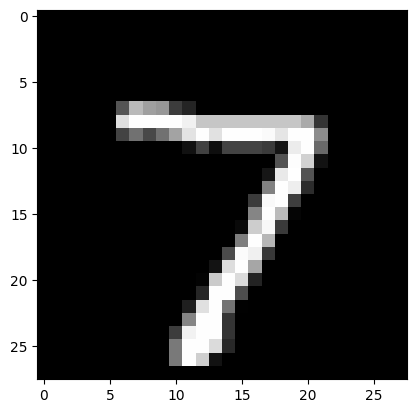

In [41]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()

Prediction: 2


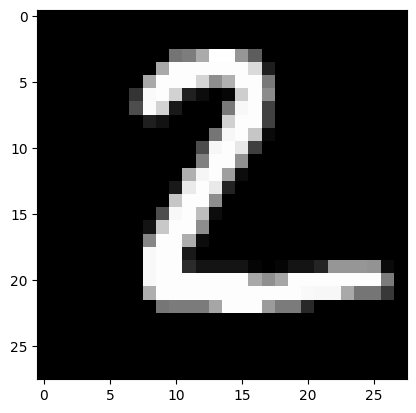

Prediction: 1


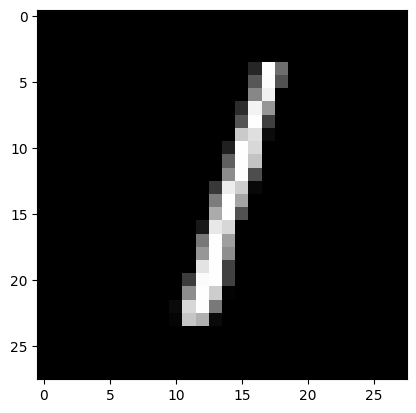

Prediction: 0


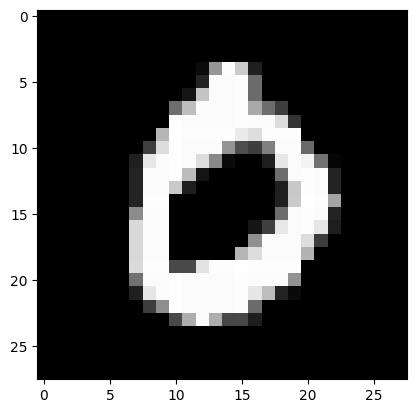

Prediction: 4


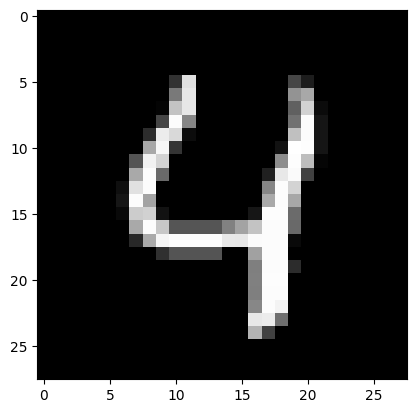

Prediction: 1


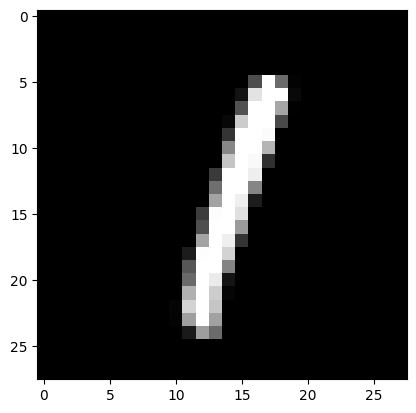

Prediction: 4


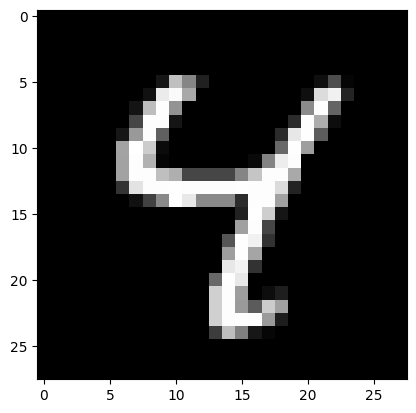

Prediction: 9


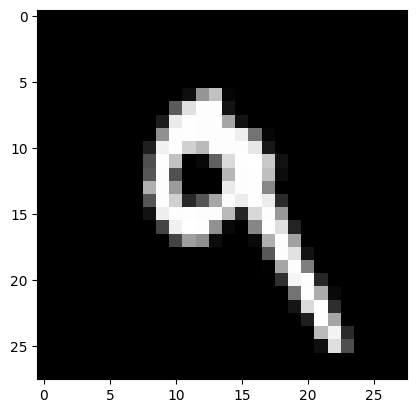

Prediction: 5


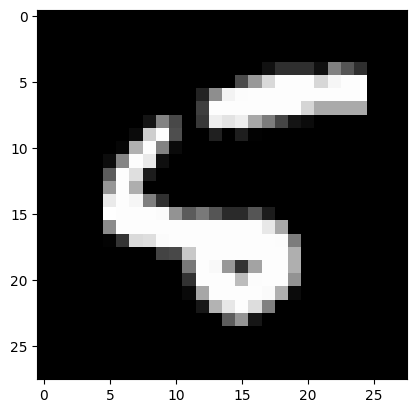

Prediction: 9


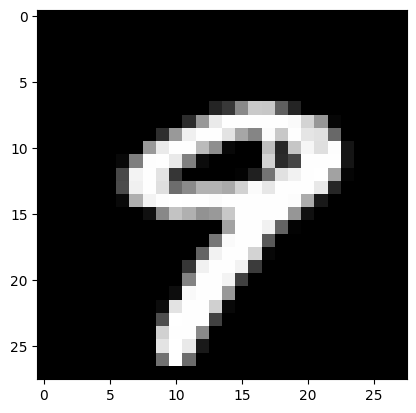

Prediction: 0


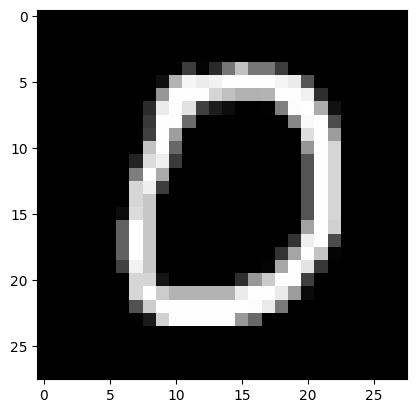

Prediction: 6


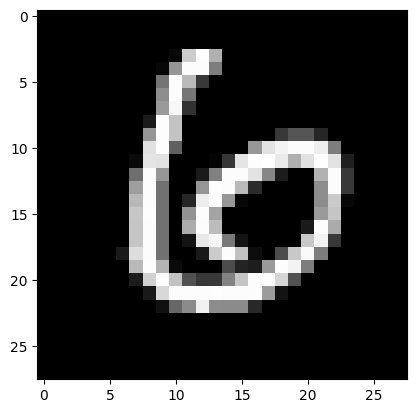

Prediction: 9


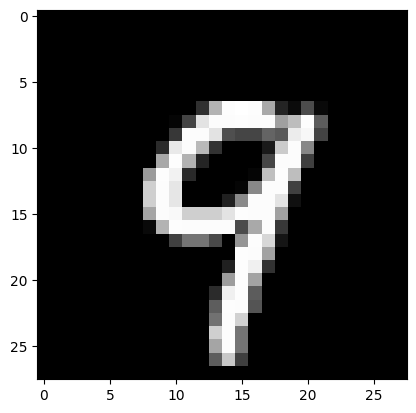

Prediction: 0


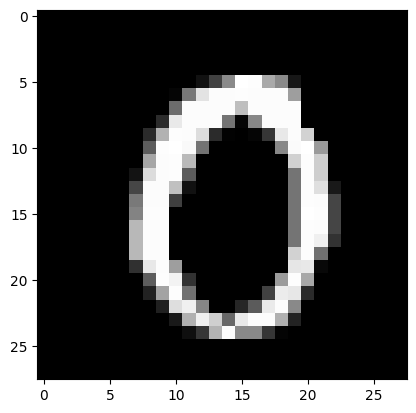

Prediction: 1


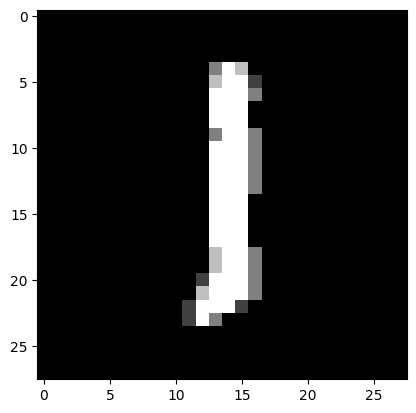

Prediction: 5


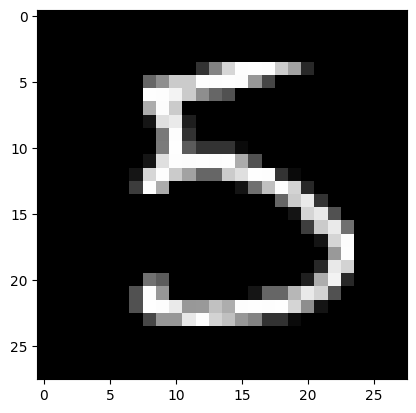

Prediction: 9


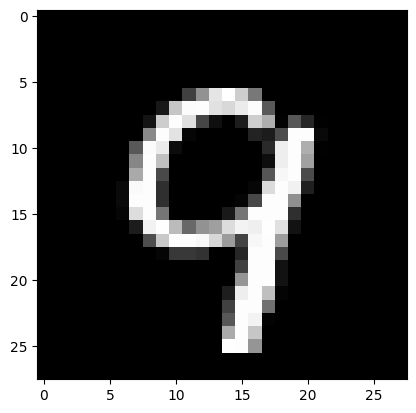

Prediction: 7


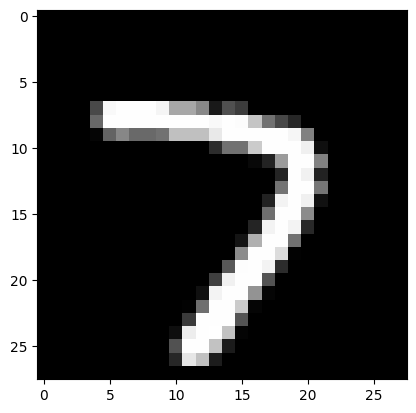

Prediction: 3


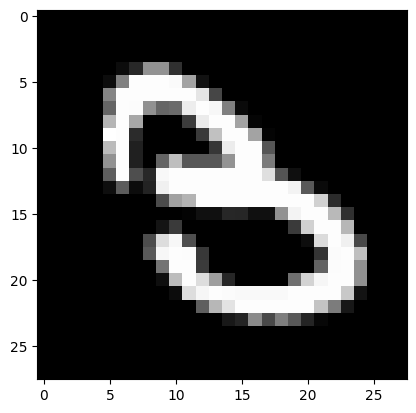

Prediction: 4


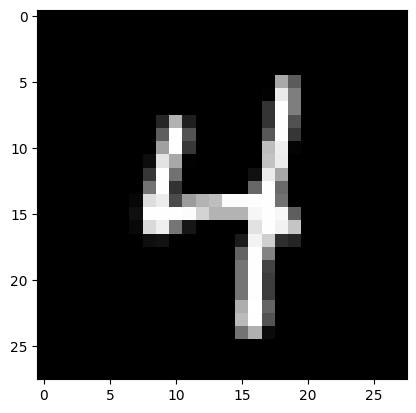

Prediction: 9


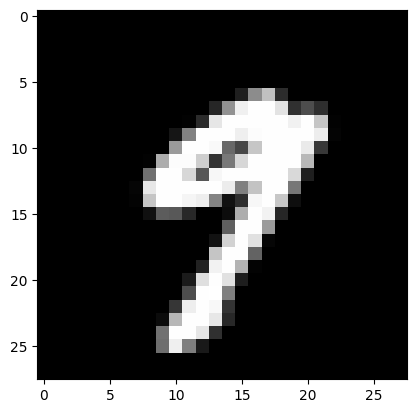

Prediction: 6


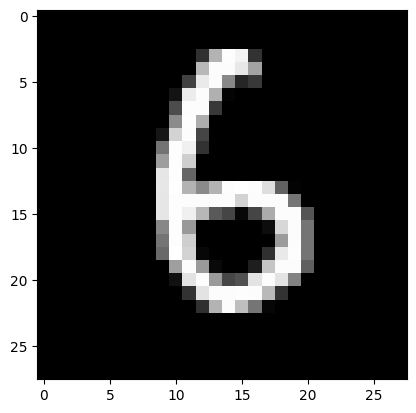

Prediction: 6


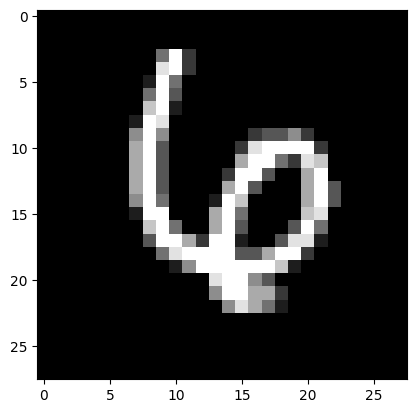

Prediction: 5


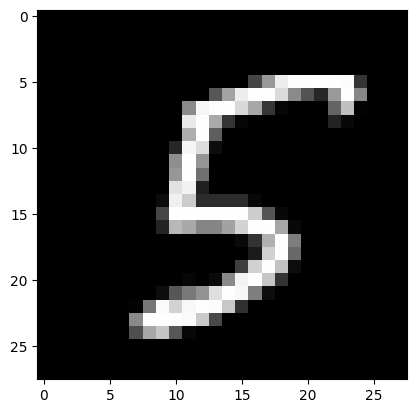

Prediction: 4


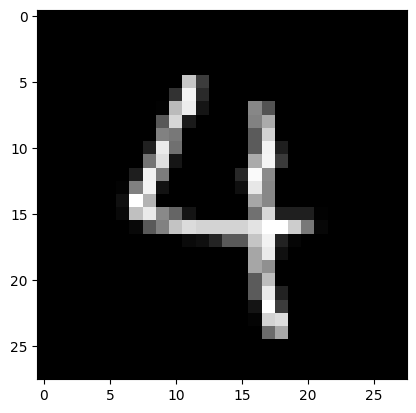

Prediction: 0


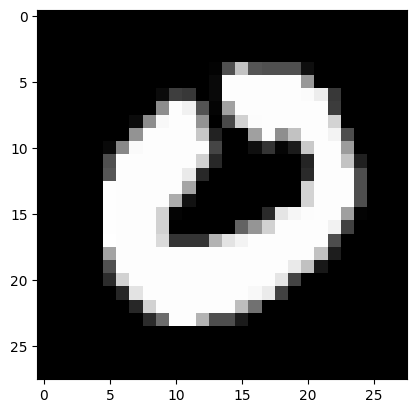

Prediction: 7


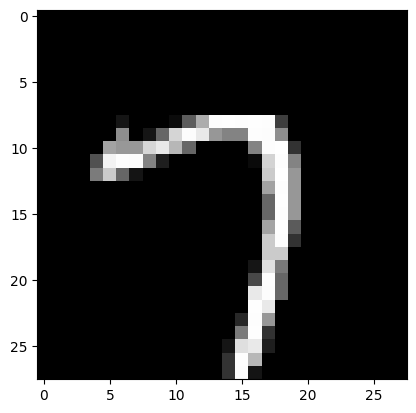

Prediction: 4


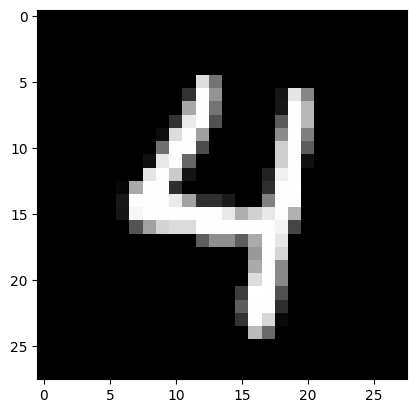

In [42]:
for i in range(1,28):
  model.eval()
  data, target = test_data[i]
  data = data.unsqueeze(0).to(device)
  output = model(data)
  prediction = output.argmax(dim=1, keepdim=True).item()
  print(f'Prediction: {prediction}')
  image = data.squeeze(0).squeeze(0).cpu().numpy()
  plt.imshow(image, cmap='gray')
  plt.show()